In [1]:
from google.colab import drive
drive.mount ('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Description of Data :**
About one in seven U.S. adults has diabetes now, according to the Centers for Disease Control and Prevention. But by 2050, that rate could skyrocket to as many as one in three. With this in mind, learning how to use Machine Learning to help us predict Diabetes. Let’s get started!

In [0]:
#importing pakages
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#importing dataset
dataset = pd.read_csv('gdrive/My Drive/Colab Notebooks/diabetes.csv')

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


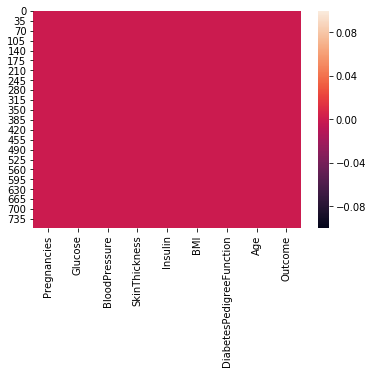

In [7]:
sns.heatmap(dataset.isnull())

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

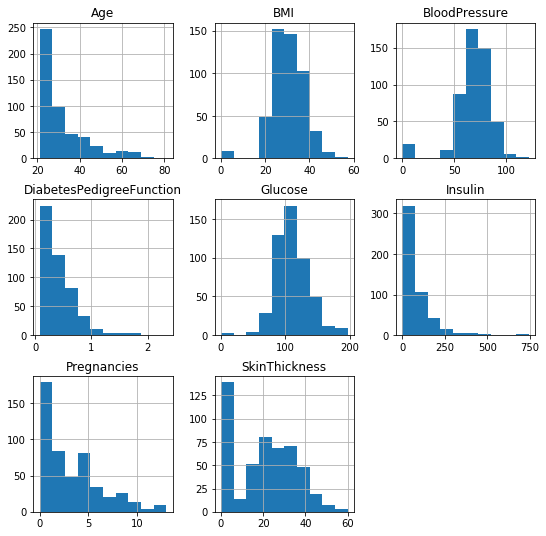

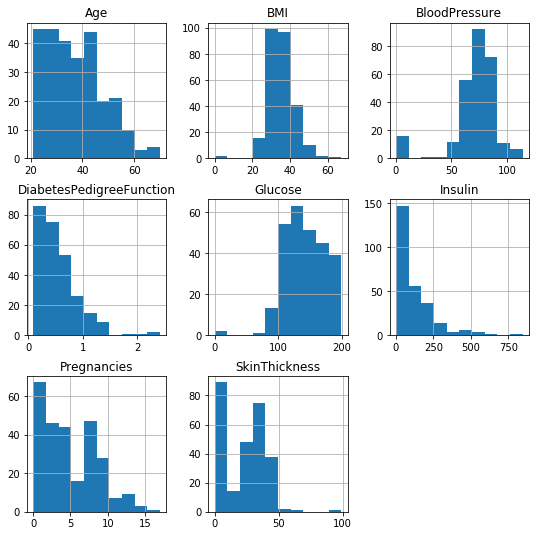

In [8]:
dataset.groupby('Outcome').hist(figsize=(9,9))

In [0]:
#splitting the independent and dependent variables.
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,8].values

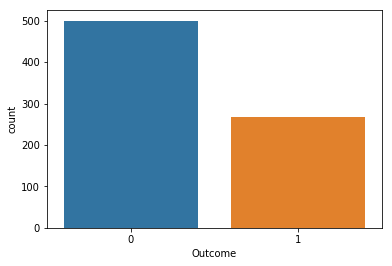

In [10]:
#counting the outcome of the diabetes study.
sns.countplot(dataset['Outcome'],label='Count')

In [11]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [0]:
#importing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(dataset.iloc[:,dataset.columns != 'Outcome'],
                                                dataset['Outcome'],stratify=dataset['Outcome'],random_state=66)

**k-Nearest Neighbors**
The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training data set. To make a prediction for a new data point, the algorithm finds the closest data points in the training data set — its “nearest neighbors.”

First, Let’s investigate whether we can confirm the connection between model complexity and accuracy:

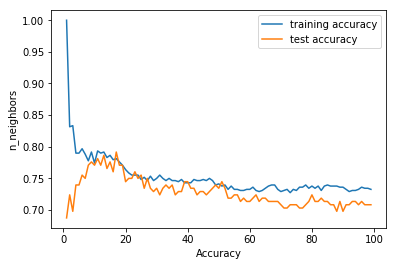

In [13]:
#importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,100)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors= n_neighbors)
    knn.fit(X_train, Y_train)
    training_accuracy.append(knn.score(X_train,Y_train))
    test_accuracy.append(knn.score(X_test,Y_test))
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.xlabel('Accuracy')
plt.ylabel('n_neighbors')
plt.legend()
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, Y_train)
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))

Accuracy of KNN classifier on training set: 0.77
Accuracy of KNN classifier on test set: 0.77


In [15]:
#importing the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual =Y_test
predicted =knn.predict(X_test)
results = confusion_matrix(actual, predicted)
print('Confusion Matrix')
print(results)
print('Accuracy Score :', accuracy_score(actual, predicted))
print('Report')
print(classification_report(actual,predicted))

Confusion Matrix
[[106  19]
 [ 25  42]]
Accuracy Score : 0.7708333333333334
Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       125
           1       0.69      0.63      0.66        67

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



In [0]:
#importing roc curve and roc curve score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
  plt.plot([0,1], [0,1],color='darkblue',linestyle='--')
  plt.title('Receiver Operating Charactersticks (ROC) Curve')
  plt.xlabel('False Positive Value')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

In [18]:
#predicting the probablity by KNN classifier
probs = knn.predict_proba(X_test)
probs[0:10]

array([[0.47368421, 0.52631579],
       [0.68421053, 0.31578947],
       [0.73684211, 0.26315789],
       [0.94736842, 0.05263158],
       [1.        , 0.        ],
       [0.63157895, 0.36842105],
       [0.42105263, 0.57894737],
       [0.52631579, 0.47368421],
       [0.89473684, 0.10526316],
       [0.73684211, 0.26315789]])

In [19]:
probs = probs[:,1]
probs[0:10]

array([0.52631579, 0.31578947, 0.26315789, 0.05263158, 0.        ,
       0.36842105, 0.57894737, 0.47368421, 0.10526316, 0.26315789])

In [20]:
auc = roc_auc_score(Y_test,probs)
print('AUC: %.2f' %auc)

AUC: 0.83


In [0]:
fpr, tpr, thresholds = roc_curve(Y_test, probs)

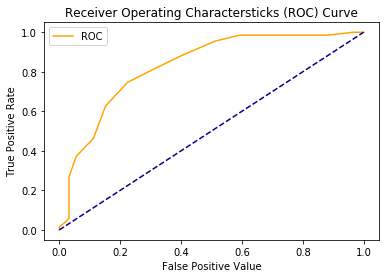

In [22]:
#plotting the roc curve
plot_roc_curve(fpr, tpr)

In [0]:
import pickle

In [0]:
#save the model to the disk
filename = 'diabetes_model.sav'
pickle.dump(knn, open(filename,'wb'))

In [27]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.predict(X)
print(result[0:100])

[1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0]
